In [60]:
"""
Perform Facial Recognition with Deep Learning in Keras Using CNN
Course-end Project 4

DESCRIPTION

Facial recognition is a biometric alternative that measures unique characteristics of a human face. Applications available today include flight check in, tagging friends and family members in photos, and “tailored” advertising. You are a computer vision engineer who needs to develop a face recognition programme with deep convolutional neural networks.

Objective: Use a deep convolutional neural network to perform facial recognition using Keras.

Dataset Details:
ORL face database composed of 400 images of size 112 x 92. There are 40 people, 10 images per person. The images were taken at different times, lighting and facial expressions. The faces are in an upright position in frontal view, with a slight left-right rotation.

Link to the Dataset: https://www.dropbox.com/s/i7uzp5yxk7wruva/ORL_faces.npz?dl=0

Prerequisites:
Keras
Scikit Learn

Steps to be followed:

1.   Input the required libraries
2.   Load the dataset after loading the dataset, you have to normalize every image.
3.   Split the dataset
4.   Transform the images to equal sizes to feed in CNN
5.   Build a CNN model that has 3 main layers:
     *    Convolutional Layer
     *    Pooling Layer
     *    Fully Connected Layer
6.   Train the model
7.   Plot the result
8.   Iterate the model until the accuracy is above 90%
"""

'\nPerform Facial Recognition with Deep Learning in Keras Using CNN\nCourse-end Project 4\n\nDESCRIPTION\n\nFacial recognition is a biometric alternative that measures unique characteristics of a human face. Applications available today include flight check in, tagging friends and family members in photos, and “tailored” advertising. You are a computer vision engineer who needs to develop a face recognition programme with deep convolutional neural networks.\n\nObjective: Use a deep convolutional neural network to perform facial recognition using Keras.\n\nDataset Details:\nORL face database composed of 400 images of size 112 x 92. There are 40 people, 10 images per person. The images were taken at different times, lighting and facial expressions. The faces are in an upright position in frontal view, with a slight left-right rotation.\n\nLink to the Dataset: https://www.dropbox.com/s/i7uzp5yxk7wruva/ORL_faces.npz?dl=0\n\nPrerequisites:\nKeras\nScikit Learn\n\nSteps to be followed:\n\n1.

In [61]:
#Step1: Input the required libraries
import keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from keras.optimizers import Adam
from keras.callbacks import TensorBoard

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [62]:
#Step2: Load the dataset after loading the dataset and have to normalize every image.
#load dataset
data = np.load('ORL_faces.npz') 

# load the "Train Images"
x_train = data['trainX']
#normalize every image
x_train = np.array(x_train,dtype='float32')/255

x_test = data['testX']
x_test = np.array(x_test,dtype='float32')/255

# load the Label of Images
y_train= data['trainY']
y_test= data['testY']

# show the train and test Data format
print('x_train : {}'.format(x_train[:]))
print('Y-train shape: {}'.format(y_train))
print('x_test shape: {}'.format(x_test.shape))

x_train : [[0.1882353  0.19215687 0.1764706  ... 0.18431373 0.18039216 0.18039216]
 [0.23529412 0.23529412 0.24313726 ... 0.1254902  0.13333334 0.13333334]
 [0.15294118 0.17254902 0.20784314 ... 0.11372549 0.10196079 0.11372549]
 ...
 [0.44705883 0.45882353 0.44705883 ... 0.38431373 0.3764706  0.38431373]
 [0.4117647  0.4117647  0.41960785 ... 0.21176471 0.18431373 0.16078432]
 [0.45490196 0.44705883 0.45882353 ... 0.37254903 0.39215687 0.39607844]]
Y-train shape: [ 0  0  0  0  0  0  0  0  0  0  0  0  1  1  1  1  1  1  1  1  1  1  1  1
  2  2  2  2  2  2  2  2  2  2  2  2  3  3  3  3  3  3  3  3  3  3  3  3
  4  4  4  4  4  4  4  4  4  4  4  4  5  5  5  5  5  5  5  5  5  5  5  5
  6  6  6  6  6  6  6  6  6  6  6  6  7  7  7  7  7  7  7  7  7  7  7  7
  8  8  8  8  8  8  8  8  8  8  8  8  9  9  9  9  9  9  9  9  9  9  9  9
 10 10 10 10 10 10 10 10 10 10 10 10 11 11 11 11 11 11 11 11 11 11 11 11
 12 12 12 12 12 12 12 12 12 12 12 12 13 13 13 13 13 13 13 13 13 13 13 13
 14 14 14 14 14 14 1

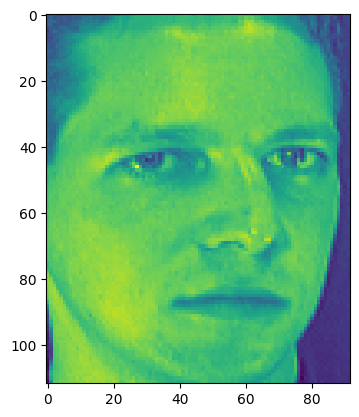

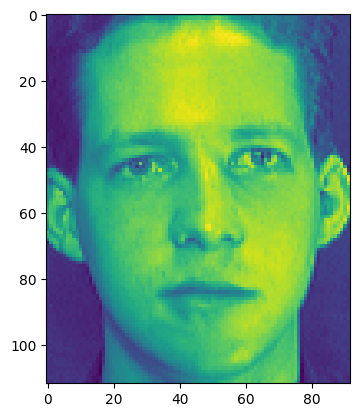

In [63]:
# To See the images in Train and Test data.
c=x_train[1].reshape(112,92)
plt.imshow(c)
plt.show()
d=x_test[1].reshape(112,92)
plt.imshow(d)

In [64]:
#Step 3: Split DataSet : Validation data and Train
x_train, x_valid, y_train, y_valid= train_test_split(
    x_train, y_train, test_size=.05, random_state=42,)

In [65]:
#Step 4: Transform the images to equal sizes to feed in CNN
#for using the CNN, we need to change The size of images ( The size of images must be the same)
im_rows=112
im_cols=92
batch_size=512
im_shape=(im_rows, im_cols, 1)

#change the size of images
x_train = x_train.reshape(x_train.shape[0], *im_shape)
x_test = x_test.reshape(x_test.shape[0], *im_shape)
x_valid = x_valid.reshape(x_valid.shape[0], *im_shape)

print('x_train shape: {}'.format(y_train.shape[0]))
print('x_test shape: {}'.format(y_test.shape[0]))

x_train shape: 228
x_test shape: 160


In [66]:
#Step 5:   Build a CNN model that has 3 main layers:
     #*    Convolutional Layer
     #*    Pooling Layer
     #*    Fully Connected Layer
#filters= the depth of output image or kernels

cnn_model= Sequential([
    Conv2D(filters=36, kernel_size=7, activation='relu', input_shape= im_shape),
    MaxPooling2D(pool_size=2),
    Conv2D(filters=54, kernel_size=5, activation='relu', input_shape= im_shape),
    MaxPooling2D(pool_size=2),
    Flatten(),
    Dense(2024, activation='relu'),
     Dropout(0.5),
    Dense(1024, activation='relu'),
    Dropout(0.5),
    Dense(512, activation='relu'),
    Dropout(0.5),
    #20 is the number of outputs
    Dense(20, activation='softmax')  
])

cnn_model.compile(
    loss='sparse_categorical_crossentropy',#'categorical_crossentropy',
    optimizer=Adam(lr=0.0001),
    metrics=['accuracy']
)

In [67]:
# Show the model's parameters
cnn_model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 106, 86, 36)       1800      
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 53, 43, 36)       0         
 g2D)                                                            
                                                                 
 conv2d_11 (Conv2D)          (None, 49, 39, 54)        48654     
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 24, 19, 54)       0         
 g2D)                                                            
                                                                 
 flatten_5 (Flatten)         (None, 24624)             0         
                                                                 
 dense_20 (Dense)            (None, 2024)             

In [68]:
# Step 6:   Train the model
history=cnn_model.fit(
    np.array(x_train), np.array(y_train), batch_size=512,
    epochs=150, verbose=2,
    validation_data=(np.array(x_valid),np.array(y_valid)),
)

Epoch 1/150


2023-03-01 17:17:16.775750: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 - 1s - loss: 3.0090 - accuracy: 0.0570 - val_loss: 2.9885 - val_accuracy: 0.0833 - 717ms/epoch - 717ms/step
Epoch 2/150


2023-03-01 17:17:17.191632: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 - 0s - loss: 3.0442 - accuracy: 0.0658 - val_loss: 3.0079 - val_accuracy: 0.0000e+00 - 199ms/epoch - 199ms/step
Epoch 3/150
1/1 - 0s - loss: 3.0288 - accuracy: 0.0570 - val_loss: 3.0172 - val_accuracy: 0.0833 - 191ms/epoch - 191ms/step
Epoch 4/150
1/1 - 0s - loss: 3.0581 - accuracy: 0.0395 - val_loss: 3.0143 - val_accuracy: 0.0833 - 191ms/epoch - 191ms/step
Epoch 5/150
1/1 - 0s - loss: 3.0347 - accuracy: 0.0482 - val_loss: 3.0087 - val_accuracy: 0.0833 - 192ms/epoch - 192ms/step
Epoch 6/150
1/1 - 0s - loss: 3.0231 - accuracy: 0.0570 - val_loss: 3.0073 - val_accuracy: 0.0833 - 192ms/epoch - 192ms/step
Epoch 7/150
1/1 - 0s - loss: 3.0086 - accuracy: 0.0789 - val_loss: 3.0025 - val_accuracy: 0.0833 - 192ms/epoch - 192ms/step
Epoch 8/150
1/1 - 0s - loss: 3.0053 - accuracy: 0.0439 - val_loss: 2.9991 - val_accuracy: 0.0000e+00 - 191ms/epoch - 191ms/step
Epoch 9/150
1/1 - 0s - loss: 2.9717 - accuracy: 0.0702 - val_loss: 2.9980 - val_accuracy: 0.0000e+00 - 194ms/epoch - 194ms/step
Epoch 10

In [69]:
# Evaluate the test data
scor = cnn_model.evaluate( np.array(x_test),  np.array(y_test), verbose=0)

print('test los {:.4f}'.format(scor[0]))
print('test acc {:.4f}'.format(scor[1]))

test los 0.3768
test acc 0.9187


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


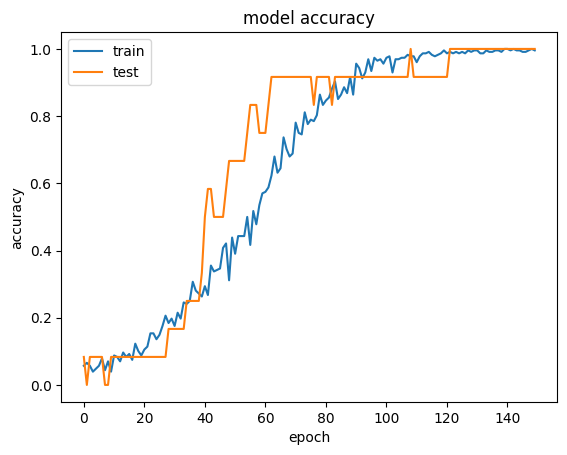

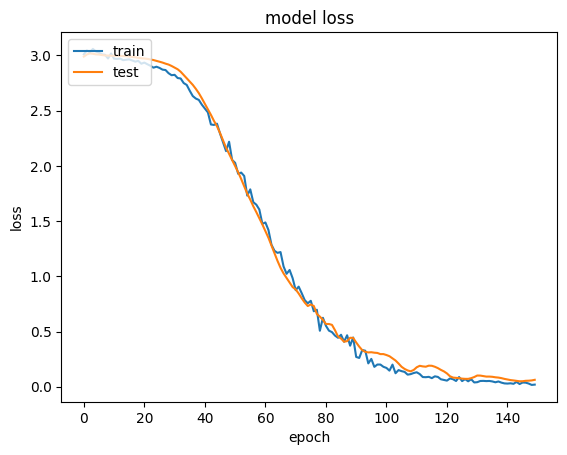

In [70]:
# Step 7:   Plot the result
# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [71]:
# Step8:   Iterate the model until the accuracy is above 90%
#First run accurancy was  %92.5 